In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
iris = load_iris()
x = iris.data[:, :2]
y = (iris.target != 0) * 1
y_ = y.reshape(-1, 1)

1. Logistic Regression doesnt have closed form solution, so we need to use Grad Descent.            
2. The cost function of LogReg is convex and there exists a definite global minima.

## Gradient Descent without Class

[[-2.99715333]
 [ 5.85547698]
 [-9.20960844]]


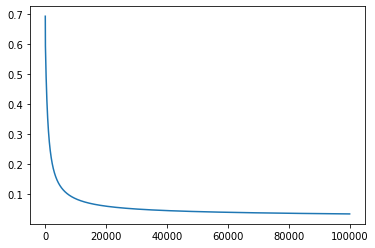

In [12]:
lr=0.01
loss = []
bias = np.ones(shape = (y.shape[0],1))
X = np.empty(shape = (x.shape[0], x.shape[1]+1))
X[:,0] = 1
X[:,1:] = x
theta = np.zeros(shape = (X.shape[1],1))
def sigmoid(val):
    return 1/(1 + np.exp(-val))

iterations = 100000
for epoch in np.arange(iterations):
    sig = sigmoid(X@theta)
    grad = X.T@(y_ - sig)
    theta = theta + lr/y_.shape[0]*grad
    loss_i = -(y_.T@np.log(sig) + (1 - y_).T@np.log(1 - sig))/y_.shape[0]
    loss.append(loss_i[0][0])
plt.plot(np.arange(iterations), loss)
print(theta)

## Build Using Sklearn

In [17]:
model = LogisticRegression()
model.fit(x, y)
print(model.intercept_[0], model.coef_)

-8.323303886430972 [[ 3.38829757 -3.1645277 ]]


We may not be able to match sklearn output as regularization is applied in sklearn library.

## Gradient Descent using Class

In [45]:
class LogisticRegression():
    def __init__(self, lr, iterations):
        super().__init__()
        self.lr = lr
        self.iterations = iterations
        
    def __concat(self):
        bias = np.ones(shape=self.x.shape[0])
        self.X = np.c_[(bias, self.x)]
        return self.X
        
    def __sigmoid(self, val):
        return 1/(1+np.exp(-val))    
    
    def fit(self, x, y):
        self.x = x
        self.y = y.reshape(-1,1)
        self.X = self.__concat()
        self.theta = np.zeros(shape=self.X.shape[1]).reshape(-1,1)

        n = len(self.x)
        for epoch in np.arange(self.iterations):        
            self.y = np.array(self.y).reshape(-1,1)
            sig = (self.y - sigmoid(self.X@self.theta))
            grad = sig.T@self.X/n
            self.theta = self.theta + self.lr*grad.T
            loss_i = self.y.T@np.log(sigmoid(self.X@self.theta)) + (1 - self.y).T@np.log(1 - sigmoid(self.X@self.theta))
            loss.append(loss_i[0,0])
        return loss, self.theta
    
    def predict_prob(self, X):
        return sigmoid(self.X@self.theta)
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold


In [46]:
model = LogisticRegression(lr, iterations)
loss, theta = model.fit(x, y)
theta

array([[-2.99715333],
       [ 5.85547698],
       [-9.20960844]])

In [51]:
model.predict_prob(x)

array([[4.64249380e-03],
       [1.26292890e-01],
       [7.05345996e-03],
       [9.83674073e-03],
       [1.03289239e-03],
       [6.78430007e-04],
       [6.26567088e-04],
       [6.48062150e-03],
       [1.90600053e-02],
       [5.44181705e-02],
       [4.26461816e-03],
       [2.01819289e-03],
       [7.44893713e-02],
       [4.28889662e-03],
       [2.80422296e-03],
       [3.93406960e-05],
       [6.78430007e-04],
       [4.64249380e-03],
       [9.78136571e-03],
       [2.94265793e-04],
       [6.35513552e-02],
       [7.38779514e-04],
       [9.93711223e-05],
       [2.85834189e-02],
       [2.01819289e-03],
       [2.06100368e-01],
       [6.48062150e-03],
       [8.30710257e-03],
       [2.06062011e-02],
       [7.05345996e-03],
       [3.10489226e-02],
       [6.35513552e-02],
       [3.33617332e-05],
       [7.69417156e-05],
       [5.44181705e-02],
       [3.95242069e-02],
       [4.62800317e-02],
       [5.75378725e-04],
       [7.67654182e-03],
       [1.15792993e-02],


In [50]:
y - model.predict(x, 0.5).T

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0]])